In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import RBFInterpolator

In [2]:
df = pd.read_csv('/home/murali/Documents/rass/data/sim_data/wTemp_wWind_0_cpu_log.csv')
df

,x,y,z,theta,time,phi
0,0.000000e+00,0.000000e+00,0.000000,-1.561820,0.0,0.000000
1,-6.711114e+02,-4.523426e+01,-15.339409,-1.625374,2.0,0.000000
2,-1.336794e+03,-1.034780e+02,-77.489862,-1.701462,4.0,0.000000
3,-1.985221e+03,-1.995073e+02,-200.693040,-1.809401,6.0,0.000000
4,-2.585298e+03,-3.914960e+02,-413.273320,-1.978404,8.0,0.000000
...,...,...,...,...,...,...
30887145,1.881431e+06,-6.666448e+06,-9084.109413,236.698808,88.0,3.141593
30887146,1.954672e+06,-6.924261e+06,-9459.104894,242.581968,90.0,3.141593
30887147,2.032794e+06,-7.199648e+06,-9540.418720,246.375777,92.0,3.141593
30887148,2.114541e+06,-7.490242e+06,-9974.954013,259.554301,94.0,3.141593


In [3]:
df['time'].unique()

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
       26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,
       52., 54., 56., 58., 60., 62., 64., 66., 68., 70., 72., 74., 76.,
       78., 80., 82., 84., 86., 88., 90., 92., 94., 96.])

In [4]:
t = 28
group_t = df.groupby('time')
df_ = group_t.get_group(t)
df_.reset_index(drop=True)

,x,y,z,theta,time,phi
0,52936.744784,-203192.634273,-6128.464380,-3.141084,28.0,0.000000
1,54119.526369,-206979.407054,-6155.325506,-3.141179,28.0,0.000000
2,24710.887614,-105892.509916,-5056.935786,-3.141084,28.0,0.000000
3,41901.947044,-164293.615431,-5748.017625,-3.141497,28.0,0.000000
4,4109.816202,-37817.304915,-3665.772714,-3.131110,28.0,0.000000
...,...,...,...,...,...,...
630345,32926.965281,-134529.116819,-5447.632797,3.140955,28.0,3.141593
630346,41074.728632,-161858.807682,-5732.296678,3.141254,28.0,3.141593
630347,41901.947044,-164293.615431,-5748.017625,3.141497,28.0,3.141593
630348,34278.403242,-138678.507129,-5483.909526,3.141208,28.0,3.141593


Epsilon: 0.01, Mean Squared Error: 0.0003031196760264083
Epsilon: 0.021544346900318832, Mean Squared Error: 6.082972500843835e-05
Epsilon: 0.046415888336127774, Mean Squared Error: 1.7856343986020266e-08
Epsilon: 0.1, Mean Squared Error: 6.567482739229874e-07
Epsilon: 0.21544346900318834, Mean Squared Error: 9.026209578858238e-09
Epsilon: 0.46415888336127775, Mean Squared Error: 3.181793431162867e-08
Epsilon: 1.0, Mean Squared Error: 1.609396802972231e-11
Epsilon: 2.154434690031882, Mean Squared Error: 9.696845333674011e-12
Epsilon: 4.6415888336127775, Mean Squared Error: 1.698020711162965e-08
Epsilon: 10.0, Mean Squared Error: 1.327055034124095e-10


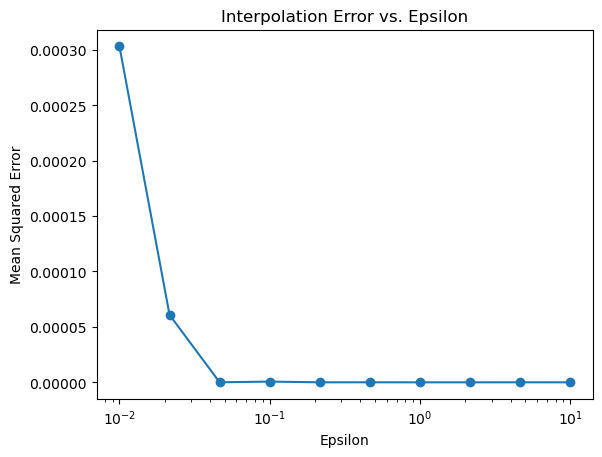

Best epsilon: 2.154434690031882
Point of interest: (1.0, 2.0, 9142.20526599465)
Normal vector at (1.0, 2.0): [-9.31294682e-04  7.68318112e-03  9.99970050e-01]
Intersection with x,y-plane: (9.514342145989321, -68.24332270441191)


In [8]:
x = df_['x'].values
y = df_['y'].values
z = df_['z'].values

points_ = np.column_stack((x, y))
values_ = z

num_samples = 10000
indices = np.random.choice(len(points_), num_samples, replace=False)
points_sampled = points_[indices]
values_sampled = values_[indices]

def evaluate_interpolation(epsilon, points, values):
    rbfi = RBFInterpolator(points, values, kernel='multiquadric', epsilon=epsilon)

    z_interp = rbfi(points)
    error = np.mean((values - z_interp)**2)
    
    return error


epsilons = np.logspace(-2, 1, 10)  # Epsilon values from 0.01 to 10
errors = []

for epsilon in epsilons:
    error = evaluate_interpolation(epsilon, points_sampled, values_sampled)
    errors.append(error)
    print(f"Epsilon: {epsilon}, Mean Squared Error: {error}")

plt.plot(epsilons, errors, marker='o')
plt.xscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Mean Squared Error')
plt.title('Interpolation Error vs. Epsilon')
plt.show()

best_epsilon = epsilons[np.argmin(errors)]
print(f"Best epsilon: {best_epsilon}")

rbfi = RBFInterpolator(points_sampled, values_sampled, kernel='multiquadric', epsilon=best_epsilon)


def interpolate_surface(xi, yi):
    return rbfi(np.column_stack((xi, yi)))


def partial_derivatives(xi, yi):
    eps = 1e-6 
    zx = (interpolate_surface(np.array([xi + eps]), np.array([yi])) - 
          interpolate_surface(np.array([xi - eps]), np.array([yi]))) / (2 * eps)
    zy = (interpolate_surface(np.array([xi]), np.array([yi + eps])) - 
          interpolate_surface(np.array([xi]), np.array([yi - eps]))) / (2 * eps)
    return zx[0], zy[0]

def normal_vector(xi, yi):
    zx, zy = partial_derivatives(xi, yi)
    normal = np.array([-zx, -zy, 1])
    return normal / np.linalg.norm(normal)

def intersection_xy_plane(xi, yi, zi, normal):
   
    nx, ny, nz = normal
    t = -zi / nz
    
    x_intersect = xi + t * nx
    y_intersect = yi + t * ny
    
    return x_intersect, y_intersect

# Example usage with the best epsilon
xi, yi = 1.0, 2.0  # Point of interest
zi = interpolate_surface(np.array([xi]), np.array([yi]))[0]
normal = normal_vector(xi, yi)
x_intersect, y_intersect = intersection_xy_plane(xi, yi, zi, normal)

print(f"Point of interest: ({xi}, {yi}, {zi})")
print(f"Normal vector at ({xi}, {yi}): {normal}")
print(f"Intersection with x,y-plane: ({x_intersect}, {y_intersect})")